In [4]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import numpy as np
import json
from math import cos, acos, sin
import seaborn as sns

In [5]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" -O iris.csv

--2025-07-10 11:03:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.csv’

iris.csv                [ <=>                ]   4.44K  --.-KB/s    in 0s      

2025-07-10 11:03:04 (63.7 MB/s) - ‘iris.csv’ saved [4551]



In [6]:
import csv

dataset = [ [], [], [], [], [] ]
measurements = [ "sepal length", "sepal width", "petal length", "petal width" ]
with open("iris.csv") as f:
    for row in csv.reader(f):
        if len(row) == 5: # only do this if the number of columns is 5, as expected
            for i in range(4): # the 4 measurements should be converted to float
                dataset[i].append(float(row[i]))
            # position 4 is the iris type, which is to be kept as a string
            dataset[4].append(row[4])

In [7]:
def mean(x):
  return sum(x) / len(x)

In [8]:
def std(x):
  u = mean(x)
  return (mean([(x_i - u) ** 2 for x_i in x])) ** 0.5

In [9]:
for i, m in enumerate(measurements):
  print(f"{m} mean {mean(dataset[i]):.4f} std {std(dataset[i]):.4f}")

sepal length mean 5.8433 std 0.8253
sepal width mean 3.0540 std 0.4321
petal length mean 3.7587 std 1.7585
petal width mean 1.1987 std 0.7606


In [10]:
iris_types = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [11]:
iris_types = set(dataset[4])
iris_types

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [12]:
for i, m in enumerate(measurements):
    print(m)
    for iris_type in iris_types:
        # For each measurement and for each iris type, build a list of values
        values = [ v for v,t in zip(dataset[i], dataset[4]) if t == iris_type ]
        print(f"{iris_type} {mean(values):.4f} {std(values):.4f}")
    print()

sepal length
Iris-virginica 6.5880 0.6295
Iris-versicolor 5.9360 0.5110
Iris-setosa 5.0060 0.3489

sepal width
Iris-virginica 2.9740 0.3193
Iris-versicolor 2.7700 0.3106
Iris-setosa 3.4180 0.3772

petal length
Iris-virginica 5.5520 0.5463
Iris-versicolor 4.2600 0.4652
Iris-setosa 1.4640 0.1718

petal width
Iris-virginica 2.0260 0.2719
Iris-versicolor 1.3260 0.1958
Iris-setosa 0.2440 0.1061



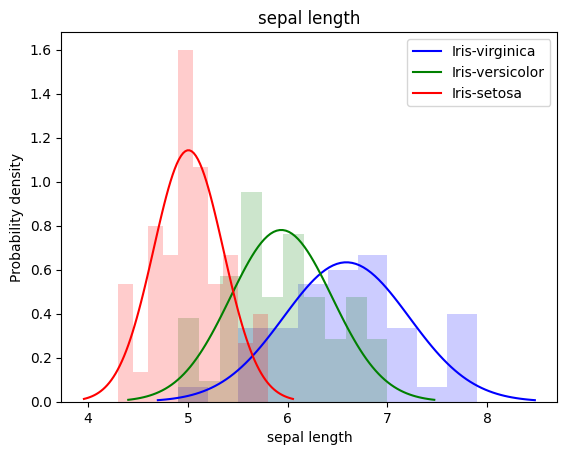

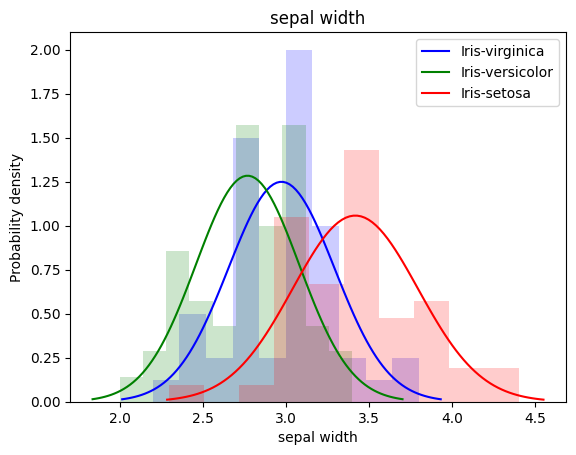

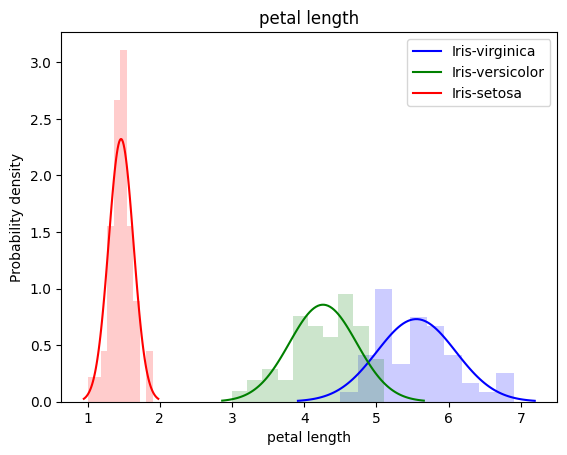

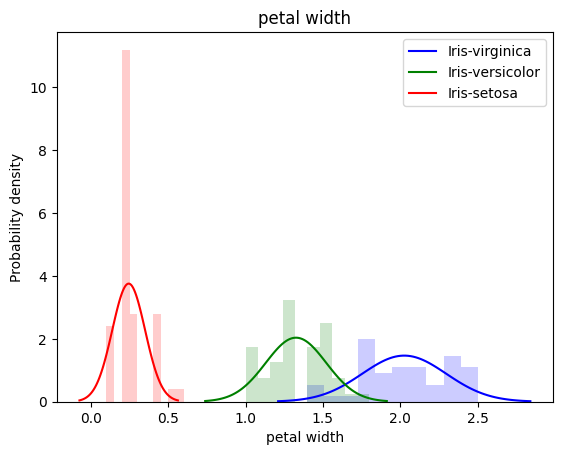

In [13]:
colors = ['b', 'g', 'r']

for i, m in enumerate(measurements):
  plt.figure()
  plt.title(m)
  for iris_type, color in zip(  iris_types, colors ):
    values = [ v for v,t in zip(dataset[i], dataset[4]) if t == iris_type ]
    plt.hist(values, density=True, alpha = 0.2, color=color)
    u = mean(values)
    s = std(values)
    x = np.linspace(u - 3 * s, u + 3 * s, 100)
    plt.plot(x, norm.pdf(x, u, s), color=color, label=iris_type)
    plt.xlabel(m)
    plt.ylabel("Probability density")
  plt.legend()

In [14]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/mnist_test.csv

--2025-07-10 11:03:05--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/mnist_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [text/plain]
Saving to: ‘mnist_test.csv.1’

mnist_test.csv.1    100%[===================>]  17.44M  --.-KB/s    in 0.07s   

2025-07-10 11:03:06 (242 MB/s) - ‘mnist_test.csv.1’ saved [18289443/18289443]



In [20]:
dataset = []
labels = []
with open("mnist_test.csv") as f:
    for cols in csv.reader(f):
        labels.append(int(cols.pop(0)))
        dataset.append(list(map(int, cols)))

In [21]:
def get_char(pixel):
    ranges = {
        (0, 64): " ",
        (64, 128): ".",
        (128, 192): "*",
        (192, 256): "#"
    }
    for (a,b),ch in ranges.items():
        if a <= pixel < b:
            return ch

In [22]:
[ get_char(0), get_char(72), get_char(192), get_char(138), get_char(250) ]

[' ', '.', '#', '*', '#']

In [23]:
def print_digit(dataset, digit):
    chars = list(map(get_char, dataset[digit]))
    for i in range(28):
      for j in range(28):
        print(chars[i * 28 + j], end="")
      print()

In [27]:
print_digit(dataset, 0)

                            
                            
                            
                            
                            
                            
                            
      .***                  
      ##############*       
      ....*##########*      
            . ...  ##.      
                  .##       
                  ##.       
                 *##        
                 ##         
                *#*         
                ##          
               .#*          
              .##           
              ##*           
             ###            
             ##.            
            ##.             
           *##              
           ###              
          .###              
          .##               
                            


In [30]:
def euclidean_distance(x, y):
  return sum([ (a - b) ** 2 for a, b in zip(x, y) ]) ** 0.5

In [31]:
( euclidean_distance([0,0], [1,1]), euclidean_distance([1,1], [1,1]), euclidean_distance([0,0], [0,1]) )

(1.4142135623730951, 0.0, 1.0)

In [33]:
positions = [25, 29, 31, 34]
for i in range(len(positions)):
  for j in range(i + 1, len(positions)):
    a = positions[i]
    b = positions[j]
    print(f"{a} {b} {euclidean_distance(dataset[a], dataset[b])}")

25 29 3539.223219860539
25 31 3556.4199695761467
25 34 3223.2069434027967
29 31 1171.8293391104355
29 34 2531.0033583541526
31 34 2515.5599774205343


In [34]:
[ labels[i] for i in (25, 29, 31, 34) ]

[0, 1, 1, 7]

In [35]:
def count_black_pixels(dataset, labels, digit):
    X = [0] * 784 # this is a fast way of initializing a 784-dimensional list with all 0's
    for values, label in zip(dataset, labels):
        if label != digit:
            continue
        for i, pixel in enumerate(values):
            if pixel >= 128: # use 128 as the threshold value
                X[i] += 1
    return X
Z = count_black_pixels(dataset, labels, 0)
O = count_black_pixels(dataset, labels, 1)

In [36]:
diff = [ abs(z-o) for z,o in zip(Z, O) ]

In [37]:
def argmax(w):
    return max(enumerate(w), key=lambda x: x[1])[0]
print(argmax(diff))

406


<Axes: title={'center': 'diff'}>

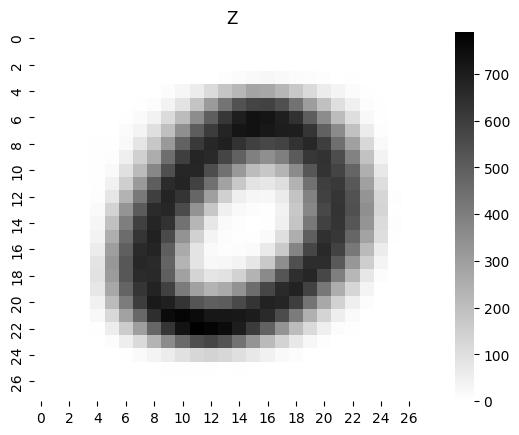

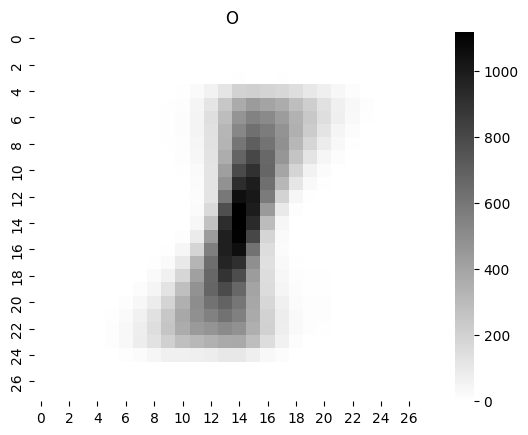

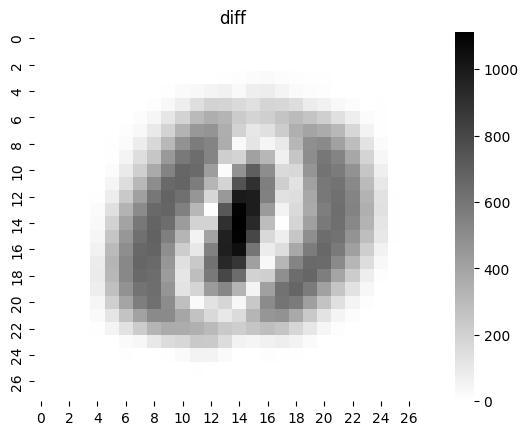

In [38]:
plt.title("Z")
sns.heatmap(np.reshape(Z, (28, 28)), cmap='binary')
plt.figure()
plt.title("O")
sns.heatmap(np.reshape(O, (28, 28)), cmap='binary')
plt.figure()
plt.title("diff")
sns.heatmap(np.reshape(diff, (28, 28)), cmap='binary')

In [39]:
(labels.count(0), labels.count(1))

(980, 1135)

In [40]:
Z_count = labels.count(0)
O_count = labels.count(1)
diff_norm = [ abs(z / Z_count - o / O_count) for z,o in zip (Z,O) ]
argmax(diff_norm)

406